### Load cleaned data and pre-defined classes

In [12]:
from data_clean import Data_to_Clean,Data_to_Analyze
import pickle
import pandas as pd
import copy
import json

MBTI_types=[
    "ISTJ", "ISFJ", "INFJ", "INTJ",
    "ISTP", "ISFP", "INFP", "INTP",
    "ESTP", "ESFP", "ENFP", "ENTP",
    "ESTJ", "ESFJ", "ENFJ", "ENTJ"
]
cleaned_data=dict.fromkeys(MBTI_types, None)

for type in cleaned_data.keys():
    file_path=f"Data\\cleaned_data\\{type}_cleaned.pkl" 
    try:
        with open(file_path, 'rb') as f:
            cleaned_data[type] = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except pickle.UnpicklingError:
        print(f"Error: Could not unpickle the file {file_path}. It might be corrupted or not a valid pickle file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


In [24]:
infp=cleaned_data["INFP"]
infp.data.head(30)

,type,posts,vader_score
0,INFP,"[think, agree, personally, consider, alpha, be...","{'neg': 0.043120000000000006, 'neu': 0.7844200..."
1,INFP,"[normal, happens, also, high, mood, act, like,...","{'neg': 0.028239999999999998, 'neu': 0.8367200..."
2,INFP,"[areh, sorry, uh, could, resist, enfjs, please...","{'neg': 0.02957142857142857, 'neu': 0.78303571..."
3,INFP,"[personally, think, would, sj, type, job, way,...","{'neg': 0.06989999999999999, 'neu': 0.76543999..."
4,INFP,"[basically, main, question, believe, value, ma...","{'neg': 0.03137500000000001, 'neu': 0.80120833..."
5,INFP,"[possible, stop, care, someone, entirely, well...","{'neg': 0.11002, 'neu': 0.7232199999999998, 'p..."
6,INFP,"[periphery, froggin, bullfish, really, bore, o...","{'neg': 0.08016, 'neu': 0.7730800000000002, 'p..."
7,INFP,"[type, people, family, gut, type, someti, ames...","{'neg': 0.04376, 'neu': 0.8262, 'pos': 0.13010..."
8,INFP,"[bruce, wayne, infj, batman, persona, esfp, mo...","{'neg': 0.056139999999999995, 'neu': 0.80054, ..."
9,INFP,"[okay, meant, create, thread, accidentally, cr...","{'neg': 0.07602000000000002, 'neu': 0.74788000..."


### Visualize VADER score of all MBTI types

In [14]:
all_vader_scores={T:cleaned_data[T].basic_identities["overall_vader_score"] for T in MBTI_types}

In [15]:
all_vader_scores=pd.DataFrame(all_vader_scores).T

In [16]:
all_vader_scores=all_vader_scores.sort_values(by="compound",ascending=False)
all_vader_scores

,neg,neu,pos,compound
ENFJ,0.057611,0.758577,0.167604,0.308523
ESFJ,0.053254,0.781725,0.154874,0.300487
ENFP,0.058749,0.761060,0.162509,0.298941
ISFJ,0.056851,0.765270,0.149513,0.264737
ISFP,0.056630,0.756095,0.148772,0.251548
INFJ,0.058895,0.774481,0.139543,0.241726
INFP,0.063244,0.764314,0.141904,0.231640
ESFP,0.058807,0.772598,0.143924,0.219346
ESTJ,0.059469,0.780332,0.140115,0.215052
ISTJ,0.058397,0.786248,0.127791,0.205078


In [17]:
all_vader_scores["compound"].describe()

count    16.000000
mean      0.227452
std       0.046923
min       0.158971
25%       0.198093
50%       0.217199
75%       0.254845
max       0.308523
Name: compound, dtype: float64

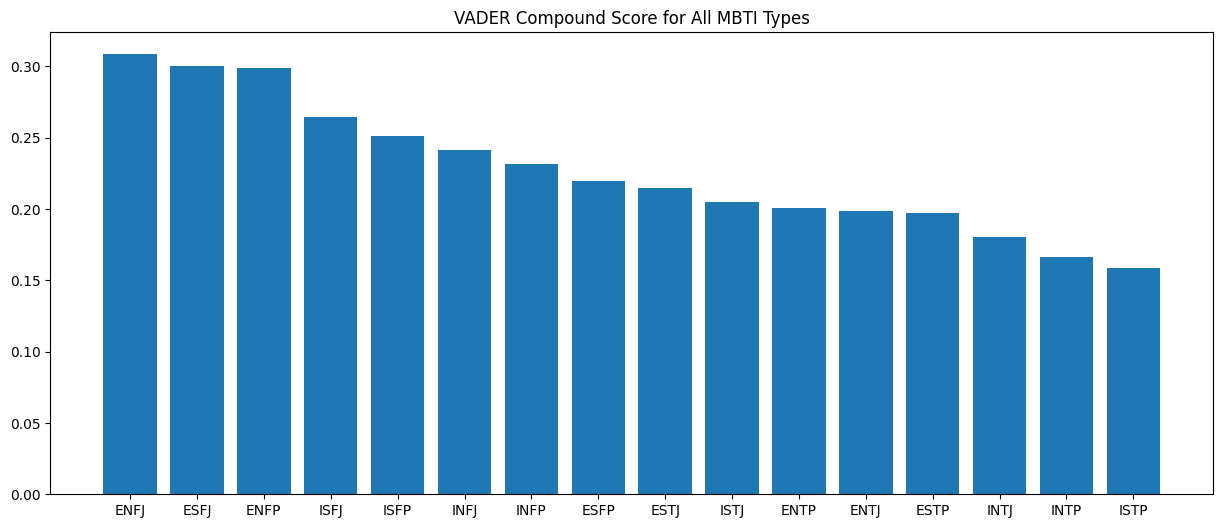

In [18]:
import matplotlib.pyplot as plt
x=all_vader_scores.index
y=all_vader_scores["compound"]
plt.figure(figsize=(15, 6))
plt.bar(x,y)
plt.title("VADER Compound Score for All MBTI Types")
plt.show()

### Construct a dictionary for LDA modeling

In [19]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
def constract_initial_dict():
    output = {T: {
        "corpus_overall": None,
        "corpus_specific": None,
        "original_text": [],
        "specific_initial_dict": None
    } for T in MBTI_types}
    def concatenate_post(post):
        complete_post=[]
        for sentence in post:
            complete_post.extend(sentence)
        return complete_post
    output["all_original_text"]=[]
    for T in MBTI_types:
        for i in cleaned_data[T].data.index:
            temp=concatenate_post(cleaned_data[T].data.loc[i,"posts"])
            cleaned_data[T].data.at[i,"posts"]=temp
            output[T]["original_text"].append(temp)
        output["all_original_text"].extend(output[T]["original_text"])
        output[T]["specific_initial_dict"]=corpora.Dictionary(output[T]["original_text"])
        output[T]["specific_initial_dict"].filter_extremes(no_above=0.3,no_below=15)
        output[T]["specific_initial_dict"].compactify()
        output[T]["corpus_specific"]=[output[T]["specific_initial_dict"].doc2bow(post_token) for post_token in output[T]["original_text"]]
    output["overall_initial_dict"]=corpora.Dictionary(output["all_original_text"])
    output["overall_initial_dict"].filter_extremes(no_above=0.2,no_below=50)
    output["overall_initial_dict"].compactify()
    output["all_corpus"]=[output["overall_initial_dict"].doc2bow(post_token) for post_token in output["all_original_text"]]
    return output
initial_dict=constract_initial_dict()
with open("Data/initial_dict.pkl",'wb') as f:
    pickle.dump(initial_dict,f)


In [20]:
def check_corpus(corpus,dict):
    result=pd.DataFrame(
        [
            list(range(len(dict))),
            [0]*len(dict)
        ]
    ).T
    result.columns=["word","frequency"]
    for post in corpus:
        for word_tuple in post:
            result.loc[word_tuple[0],"frequency"]+=word_tuple[1]
            #result.loc[word_tuple[0],"word"]=initial_dict["overall_initial_dict"][word_tuple[0]]
    for i in result.index:
        result.loc[i,"word"]=dict[i]
    result=result.sort_values(by="frequency",ascending=False)
    result.to_csv(r"Data\id2word_result.csv")
check_corpus(initial_dict["all_corpus"],initial_dict["overall_initial_dict"])

C:\Users\DominicMin\AppData\Local\Temp\ipykernel_16268\273948434.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'accyou' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[i,"word"]=dict[i]


In [21]:
initial_dict["overall_initial_dict"][266]

'percei'

### Create a class for modeling

In [22]:
with open("Data/initial_dict.pkl","rb") as f:
    initial_dict=pickle.load(f)
import gensim.corpora as corpora
import gensim
from tqdm import tqdm
from gensim.models import LdaMulticore,CoherenceModel
def optimize_topic_num(
  start,
  end,
  step,
  dict=initial_dict["overall_initial_dict"],
  corpus=initial_dict["all_corpus"],
  text=initial_dict["all_original_text"]      
):
  output=pd.Series({},dtype=float)
  topic_num_range = range(start, end+1, step)
  for topic_num in tqdm(topic_num_range, desc="计算全局模型主题数"):
  # 训练 LDA 模型 (在所有帖子数据上)
    temp_lda_model = LdaMulticore(
        corpus=corpus,    # 使用所有帖子的词袋语料
        id2word=dict,         # 使用全局词典
        num_topics=topic_num,
        random_state=100,
        chunksize=2500,
        passes=5,
        alpha="asymmetric",
        eta="auto",
        per_word_topics=False,
        workers=None                     
    )

    # 计算 Coherence (C_v) 分数 (评估全局模型在所有数据上的性能)
    temp_chmodel = CoherenceModel(
        model=temp_lda_model,
        texts=text,
        dictionary=dict,
        coherence="c_v"
    )
    output[topic_num] = temp_chmodel.get_coherence()
  print(output)
    

In [23]:
optimize_topic_num(7,50,7)

计算全局模型主题数: 100%|██████████| 7/7 [28:30<00:00, 244.40s/it]

7     0.319839
14    0.330034
21    0.325277
28    0.316176
35    0.314014
42    0.298808
49    0.292375
dtype: float64
